# Project: No-show Appointment Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analysis Kaggle dataset which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. In particular, I will be analysis what are some important factors that would lead to the higher patients no-show rates.


In [3]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/mhong-ai/Appointment_NoShow_DataScienceProject/main/KaggleV2-May-2016.csv")
df.head(10) # To check 10 rows of the datasets

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


1. From the indexs, we did see some needs to be changed: PatientId, AppointmentID, ScheduledDay, AppointmentDay, No-show. They need to be easier read and consistent with "SMS_received". 
2. "No-show" value is "yes"and "no". It is better to change to "1" and "0"
3. We Should consider to add one more column: "appointment durationg days". Before that, we want to first to know the datatype.
4. "Patient ID" datatype needs to be changed

In [8]:
# To check how many datasetsand rows we have
df.shape 

(110527, 14)

We have total 110527 datasets, and 14 columns.

In [9]:
# this returns useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
# To check out the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


both "patientID"and "appointmentID" datatype need to be changed to "string"

In [11]:
# To further analysis the datatype of 'ScheduledDay', 'AppointmentDay'
type(df['ScheduledDay'][0]),type(df['AppointmentDay'][0])

(str, str)

In [12]:
# this returns the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We can tell:
1. There are repeating customers. We should consider to check whether there are certain customers have higher chances of 'no-show'.
2. It seems "HANDCAP" column information may be wrong: it shows there are five unique values for this column. It needs to be further checked.

In [13]:
# To check the unique value of "Handcap" column
df.Handcap.unique()

array([0, 1, 2, 3, 4])

"Handcap" column value is wrong, should be only "0" and "1", needs to be fixed. 

In [14]:
# To check null value of datasets
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values for our datasets

In [15]:
#To check duplicate data
df.duplicated().sum()

0

In [16]:
# save progress to a new file named:'noshowappointments.csv'
df.to_csv('NoshowAppointments_New.csv', index=False)

### Data Cleaning (Replace this with more specific notes!)

In [17]:
#1. From the indexs, we did see some needs to be changed: PatientId, AppointmentID, ScheduledDay, AppointmentDay, No-show. They need to be easier read and consistent with "SMS_received". 
# To rename 'No-show' as 'No_Show', 'PatientId' as 'Patient_Id',
   #'ScheduledDay'as'Scheduled_Day', 'SMS_received'as'SMS_Received'
df.rename(columns={'No-show':'No_Show'},inplace=True)
df.rename(columns={'PatientId':'Patient_ID'},inplace=True)
df.rename(columns={'AppointmentID':'Appointment_ID'},inplace=True)
df.rename(columns={'ScheduledDay':'Scheduled_Day'},inplace=True)
df.rename(columns={'AppointmentDay':'Appointment_Day'},inplace=True)
df.rename(columns={'SMS_received':'SMS_Received'},inplace=True)
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
#2. #To convert 'No_Show': Yes to 1, No to 0
df['No_Show'] = df['No_Show'].replace(to_replace = "Yes", value = 1)
df['No_Show'] = df['No_Show'].replace(to_replace = "No", value = 0)
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [19]:
#4. #Change "patientID" from "float" to "str"
df.Patient_ID = df.Patient_ID.astype(float).astype(np.int64)

In [20]:
# To confirm both changes
df.dtypes

Patient_ID          int64
Appointment_ID      int64
Gender             object
Scheduled_Day      object
Appointment_Day    object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_Received        int64
No_Show             int64
dtype: object

The datatype of "patientID" is now changed in int.

In [21]:
#5. "Handcap" column value should be fixed:
# We should first check how many rows are valued: "2, 3, 4", and considering drop them. As we can't be sure they are "0" or "1".
# To check how many rows are valued: "2, 3, 4":
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

From the result, we can see: rows with values "2,3,4" only add up to 199 among over 110000 dataset. 
We can drop them. 

In [22]:
# To drop values of "2,3,4" in "Handcap" column
df_HandcapDrop = df[ df['Handcap'] > 1 ] 
df = df.drop(df_HandcapDrop.index, axis=0)

In [23]:
# To check the change
df['Handcap'].value_counts()

0    108286
1      2042
Name: Handcap, dtype: int64

Now, "Handcap" rows only have "0" and "1". "2, 3, 4" are dropped. 

In [24]:
# df['Handcap'].value_counts().plot(kind='bar', title='Handcap Counts')
#plt.xlabel('Handcap', fontsize=18)
#plt.ylabel('Total Counts', fontsize=18)

In [25]:
#3. To change the datatype of 'ScheduledDay', 'AppointmentDay'from "str" to "daytime".
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

In [26]:
#to check the conversion
df.head(10)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1
8,56394729949972,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,0
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0


In [27]:
# To add a new column "Duration_Time"
df['Duration_Time'] = df['Appointment_Day'] - df['Scheduled_Day'] 
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show,Duration_Time
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1 days +05:21:52
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1 days +07:51:33
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1 days +07:40:56
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1 days +06:30:29
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1 days +07:52:37


In [28]:
# save progress to a new file named:'noshowappointments.csv'
df.to_csv('NoshowAppointments_New.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### Q1: Whether certain patients have higher frequencies of No-shows than others 


In [29]:
df['Patient_ID'].value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
871374938638855    62
                   ..
31638467315         1
89279955685         1
5883897911366       1
56326578686847      1
57863365759569      1
Name: Patient_ID, Length: 62191, dtype: int64

In [30]:
# filter datasets for rows following 'No_Show'
df_noshow = df.query('No_Show == "1"')

In [31]:
df_noshow

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show,Duration_Time
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1 days 08:54:48
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1 days 08:20:02
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1,2 days 15:15:48
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,1,0 days 14:31:03
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,1,1 days 16:08:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,513364984676544,5772155,F,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45,BARRO VERMELHO,0,0,0,0,0,0,1,3 days 09:16:04
110492,645634214296344,5786741,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,1,-1 days +15:09:41
110496,85442954737999,5779046,F,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,1,0,0,0,0,1,1 days 06:24:22
110515,645634214296344,5778621,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,1,1 days 08:01:55


In [32]:
df_NoshowCount_new = df[df['No_Show']==1].groupby('Patient_ID').size().reset_index(name="Total_Noshow_Times").sort_values(by="Total_Noshow_Times", ascending = False)

In [33]:
df_NoshowCount_new.head(40)

,Patient_ID,Total_Noshow_Times
3060,1421986987763,18
15706,563513528548171,16
5137,5587789811398,15
15785,581197334462339,14
11267,65751443779385,13
2925,1198157171975,12
3725,2728422248149,11
1688,476861615941,11
7192,9715135545613,11
14301,249163747571517,11


From the result, we can see the top 40 highest total "No-show" patient ID. Now we can further analysis based on the list, such as "how many appointments" each of these patients had made in total, the duration time, whether they are handcap, whether they received SMS messages, whether they received scholarship. 

In [ ]:
# To merge the new colomuns to the "no_show" dataframe
df_no_show_new = df_noshow.merge(df_NoshowCount_new, how="outer")

In [ ]:
df_no_show_new

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show,Duration_Time,Total_Noshow_Times
0,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1 days 08:54:48,1
1,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1 days 08:20:02,2
2,3449833394123,5715560,F,2016-05-18 14:37:11+00:00,2016-05-19 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,0 days 09:22:49,2
3,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1,2 days 15:15:48,1
4,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,1,0 days 14:31:03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22273,4455243979994,5638153,F,2016-04-29 07:45:43+00:00,2016-06-06 00:00:00+00:00,34,RESISTÊNCIA,1,0,0,0,0,1,1,37 days 16:14:17,1
22274,594422525164283,5639147,F,2016-04-29 08:45:44+00:00,2016-06-06 00:00:00+00:00,43,RESISTÊNCIA,1,0,0,0,0,1,1,37 days 15:14:16,1
22275,645634214296344,5786741,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,1,-1 days +15:09:41,2
22276,645634214296344,5778621,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,1,1 days 08:01:55,2


In [ ]:
# To sort the new no_show dataframe by 'No_Show_Frequency', in ascending order
df_no_show_new.sort_values(by='Total_Noshow_Times', ascending=0)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show,Duration_Time,Total_Noshow_Times
12599,1421986987763,5761188,M,2016-06-01 16:38:28+00:00,2016-06-01 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +07:21:32,18
12590,1421986987763,5660316,M,2016-05-04 16:07:01+00:00,2016-05-04 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +07:52:59,18
12601,1421986987763,5757667,M,2016-06-01 09:41:24+00:00,2016-06-01 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +14:18:36,18
12600,1421986987763,5785684,M,2016-06-08 07:32:52+00:00,2016-06-08 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +16:27:08,18
12584,1421986987763,5683659,M,2016-05-11 07:44:50+00:00,2016-05-11 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +16:15:10,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,41684682464468,5587392,M,2016-04-15 08:37:39+00:00,2016-05-20 00:00:00+00:00,35,CARATOÍRA,0,0,0,0,0,0,1,34 days 15:22:21,1
9695,633366388268,5587350,M,2016-04-15 08:35:14+00:00,2016-05-20 00:00:00+00:00,40,CARATOÍRA,0,0,0,0,0,0,1,34 days 15:24:46,1
9696,81519191469625,5700750,F,2016-05-16 09:44:40+00:00,2016-05-20 00:00:00+00:00,54,CARATOÍRA,0,1,0,0,0,0,1,3 days 14:15:20,1
9697,386634599711175,5700394,F,2016-05-16 09:25:09+00:00,2016-05-20 00:00:00+00:00,19,INHANGUETÁ,0,0,0,0,0,0,1,3 days 14:34:51,1


In [ ]:
df_ns_sorted = df_no_show_new[df_no_show_new.Total_Noshow_Times>3].sort_values(by="Total_Noshow_Times", ascending=False)

In [ ]:
df_ns_sorted

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show,Duration_Time,Total_Noshow_Times
12597,1421986987763,5758102,M,2016-06-01 10:16:17+00:00,2016-06-01 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +13:43:43,18
12587,1421986987763,5740918,M,2016-05-25 16:34:32+00:00,2016-05-25 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +07:25:28,18
12600,1421986987763,5785684,M,2016-06-08 07:32:52+00:00,2016-06-08 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +16:27:08,18
12599,1421986987763,5761188,M,2016-06-01 16:38:28+00:00,2016-06-01 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +07:21:32,18
12598,1421986987763,5785809,M,2016-06-08 07:41:10+00:00,2016-06-08 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +16:18:50,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,224493451777,5672752,F,2016-05-09 08:27:31+00:00,2016-05-09 00:00:00+00:00,35,JARDIM DA PENHA,0,0,0,0,0,0,1,-1 days +15:32:29,4
12000,224493451777,5672761,F,2016-05-09 08:27:54+00:00,2016-05-09 00:00:00+00:00,35,JARDIM DA PENHA,0,0,0,0,0,0,1,-1 days +15:32:06,4
12001,224493451777,5660388,F,2016-05-04 16:22:23+00:00,2016-05-17 00:00:00+00:00,36,JARDIM DA PENHA,0,0,0,0,0,0,1,12 days 07:37:37,4
12003,324849378734,5596833,F,2016-04-18 15:23:23+00:00,2016-05-04 00:00:00+00:00,7,JOANA D´ARC,1,0,0,0,0,1,1,15 days 08:36:37,4


In [ ]:
# To show all the 1492 rows.
pd.set_option('display.max_rows', 1492)

In [ ]:
df_ns_sorted.head(1492)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show,Duration_Time,Total_Noshow_Times
12597,1421986987763,5758102,M,2016-06-01 10:16:17+00:00,2016-06-01 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +13:43:43,18
12587,1421986987763,5740918,M,2016-05-25 16:34:32+00:00,2016-05-25 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +07:25:28,18
12600,1421986987763,5785684,M,2016-06-08 07:32:52+00:00,2016-06-08 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +16:27:08,18
12599,1421986987763,5761188,M,2016-06-01 16:38:28+00:00,2016-06-01 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +07:21:32,18
12598,1421986987763,5785809,M,2016-06-08 07:41:10+00:00,2016-06-08 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +16:18:50,18
12584,1421986987763,5683659,M,2016-05-11 07:44:50+00:00,2016-05-11 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +16:15:10,18
12585,1421986987763,5660212,M,2016-05-04 15:50:42+00:00,2016-05-04 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +08:09:18,18
12586,1421986987763,5660224,M,2016-05-04 15:51:21+00:00,2016-05-04 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +08:08:39,18
12588,1421986987763,5683709,M,2016-05-11 07:47:24+00:00,2016-05-11 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +16:12:36,18
12596,1421986987763,5758202,M,2016-06-01 10:25:09+00:00,2016-06-01 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +13:34:51,18


In [ ]:
df_ns_sorted_under18 = df_ns_sorted.query('Age <18')

In [ ]:
df_ns_sorted_under18.shape

(503, 16)

In [ ]:
df_ns_sorted_under18.nunique()

Patient_ID             85
Appointment_ID        503
Gender                  2
Scheduled_Day         311
Appointment_Day        26
Age                    16
Neighbourhood          42
Scholarship             2
Hipertension            2
Diabetes                1
Alcoholism              2
Handcap                 2
SMS_Received            2
No_Show                 1
Duration_Time         311
Total_Noshow_Times     14
dtype: int64

In [ ]:
# To calculate the proportion of No_show Under 18 unique cases
proportion_ns_sorted_under18 = 85 / 503

In [ ]:
proportion_ns_sorted_under18

0.16898608349900596

In [ ]:
df_ns_sorted_under18.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show,Duration_Time,Total_Noshow_Times
12597,1421986987763,5758102,M,2016-06-01 10:16:17+00:00,2016-06-01 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +13:43:43,18
12587,1421986987763,5740918,M,2016-05-25 16:34:32+00:00,2016-05-25 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +07:25:28,18
12600,1421986987763,5785684,M,2016-06-08 07:32:52+00:00,2016-06-08 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +16:27:08,18
12599,1421986987763,5761188,M,2016-06-01 16:38:28+00:00,2016-06-01 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +07:21:32,18
12598,1421986987763,5785809,M,2016-06-08 07:41:10+00:00,2016-06-08 00:00:00+00:00,9,SÃO BENEDITO,0,0,0,0,1,0,1,-1 days +16:18:50,18


In [ ]:
df_ns_sorted_over18 = df_ns_sorted.query('Age >=18')

In [ ]:
df_ns_sorted_over18.shape

(989, 16)

In [ ]:
df_ns_sorted_over18.nunique()

Patient_ID            206
Appointment_ID        989
Gender                  2
Scheduled_Day         798
Appointment_Day        26
Age                    63
Neighbourhood          58
Scholarship             2
Hipertension            2
Diabetes                2
Alcoholism              2
Handcap                 2
SMS_Received            2
No_Show                 1
Duration_Time         798
Total_Noshow_Times      8
dtype: int64

In [ ]:
proportion_ns_sorted_over18 = 206 / 989

In [ ]:
proportion_ns_sorted_over18

0.2082912032355915

In [ ]:
df_ns_sorted_over18.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show,Duration_Time,Total_Noshow_Times
6333,2728422248149,5635984,F,2016-04-28 14:22:23+00:00,2016-05-20 00:00:00+00:00,44,SÃO JOSÉ,0,0,0,0,0,0,1,21 days 09:37:37,11
6335,2728422248149,5636094,F,2016-04-28 14:29:54+00:00,2016-05-20 00:00:00+00:00,44,SÃO JOSÉ,0,0,0,0,0,0,1,21 days 09:30:06,11
6334,2728422248149,5635969,F,2016-04-28 14:21:50+00:00,2016-05-06 00:00:00+00:00,44,SÃO JOSÉ,0,0,0,0,0,0,1,7 days 09:38:10,11
6338,2728422248149,5617856,F,2016-04-25 17:19:03+00:00,2016-06-06 00:00:00+00:00,44,SÃO JOSÉ,0,0,0,0,0,1,1,41 days 06:40:57,11
6336,2728422248149,5636029,F,2016-04-28 14:26:13+00:00,2016-05-06 00:00:00+00:00,44,SÃO JOSÉ,0,0,0,0,0,0,1,7 days 09:33:47,11


If we consider the "one-time", "two-time" appointment no-show may be an accident. Then we should analysis of the frequency of "3 times" or more. From the result above, we can learn that, there are 1492 records of patients who have more than 3 times of 'No_show frequency', 503 of them are under 18, 989 of them are over 18. For the no-show records of age under 18, 83 out of 503 are unique cases. The uniqueness is 16.90%. For the no-show records of age 18 or over, 206 out of 989 are unique cases. The uniqueness is 20.83%.


So patients who are under 18 have slightly higher of "No_show" frequency: 3.9% . Also, it seems SMS received or not doesn't affect the result of "show/no-show", but for this, we need to further analysis.

In [ ]:
# 'handcap' ==1, no-show, age <18
ns_under18_hc = df_ns_sorted_under18.query('Handcap==1')

In [ ]:
ns_under18_hc.shape

(28, 16)

In [ ]:
#To calculate of porportion of no-show records under 18 who is in handcap
proportion_ns_under18_hc = 28/503

In [ ]:
proportion_ns_under18_hc

0.055666003976143144

In [ ]:
# filter datasets for age <18 from the no-show dataset
df_under18 = df_noshow.query('Age <18')
df_under18

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show,Duration_Time
21,12154843752835,5628338,F,2016-04-27 10:50:45+00:00,2016-04-29 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,1,1 days 13:09:15
22,863229818887631,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,1,3 days 10:30:44
31,311284853849,5628907,M,2016-04-27 12:07:14+00:00,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,1,0,0,0,0,0,1,1 days 11:52:46
56,475118896369823,5600005,M,2016-04-19 09:47:43+00:00,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,0,0,0,0,0,1,1,9 days 14:12:17
61,559463646617,5626971,F,2016-04-27 08:53:09+00:00,2016-04-29 00:00:00+00:00,2,NOVA PALESTINA,0,0,0,0,0,0,1,1 days 15:06:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110428,9167383147643,5771346,F,2016-06-03 12:33:46+00:00,2016-06-08 00:00:00+00:00,8,RESISTÊNCIA,0,0,0,0,0,1,1,4 days 11:26:14
110431,2175329411587,5769362,M,2016-06-03 08:45:25+00:00,2016-06-08 00:00:00+00:00,12,RESISTÊNCIA,0,0,0,0,0,1,1,4 days 15:14:35
110442,71679471592828,5703900,M,2016-05-16 14:41:52+00:00,2016-06-06 00:00:00+00:00,8,RESISTÊNCIA,0,0,0,0,0,1,1,20 days 09:18:08
110449,291145987362399,5749879,F,2016-05-31 08:19:23+00:00,2016-06-06 00:00:00+00:00,12,RESISTÊNCIA,0,0,0,0,0,1,1,5 days 15:40:37


In [ ]:
# filter datasets for age <18 from the whole dataset
df_over18 = df_noshow.query('Age >=18')
df_over18

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show,Duration_Time
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1 days 08:54:48
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1 days 08:20:02
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1,2 days 15:15:48
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,1,0 days 14:31:03
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,1,1 days 16:08:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,513364984676544,5772155,F,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45,BARRO VERMELHO,0,0,0,0,0,0,1,3 days 09:16:04
110492,645634214296344,5786741,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,1,-1 days +15:09:41
110496,85442954737999,5779046,F,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,1,0,0,0,0,1,1 days 06:24:22
110515,645634214296344,5778621,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,1,1 days 08:01:55


we have total of 22278 no-show records, there are 5990 of them are under 18, 16288 of them are 18 or over. Let's check out the unique value of each.

In [ ]:
# To check the unique values of no_show records
df_noshow.nunique()

Patient_ID         17632
Appointment_ID     22278
Gender                 2
Scheduled_Day      21139
Appointment_Day       27
Age                  100
Neighbourhood         80
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                2
SMS_Received           2
No_Show                1
Duration_Time      21090
dtype: int64

In [ ]:
# To check the unique value of age <18 from the no-show dataset
df_under18.nunique()

Patient_ID         4736
Appointment_ID     5990
Gender                2
Scheduled_Day      5626
Appointment_Day      26
Age                  18
Neighbourhood        76
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handcap               2
SMS_Received          2
No_Show               1
Duration_Time      5613
dtype: int64

In [ ]:
# To check the unique value of age >=18 from the no-show dataset
df_over18.nunique()

Patient_ID         12897
Appointment_ID     16288
Gender                 2
Scheduled_Day      15599
Appointment_Day       27
Age                   82
Neighbourhood         80
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                2
SMS_Received           2
No_Show                1
Duration_Time      15566
dtype: int64

In [ ]:
# 'handcap' ==1, no-show, age >=18
ns_over18_hc = df_ns_sorted_over18.query('Handcap==1')

In [ ]:
ns_over18_hc.shape

(46, 16)

In [ ]:
#To calculate of porportion of no-show records, age>= 18 who is in handcap
proportion_ns_over18_hc = 46/989

In [ ]:
proportion_ns_over18_hc

0.046511627906976744

In [ ]:
Proportion_ns_under18 = 4736/5990

In [ ]:
Proportion_ns_under18

0.7906510851419032

In [ ]:
Proportion_ns_over18 = 12897 / 16288

In [ ]:
Proportion_ns_over18

0.7918099214145383

We have total of 22278 no-show records,17632 out of 22278 are unique.There are 5990 of them are under 18, 4736 out of 5990 are unique values. There are 16288 of records are 18 or over, 12897 out of 16288 are unique values. The result of proportion calculations of no-show for both groups are quite similar. 


Age doesn't really affect much of the results of show-up for their appointments or not. 

From the analysis earlier, we already learnt that patients who are under 18 have slightly higher of "No_show" frequency: 3.9% . Also, it seems SMS received or not doesn't affect the result of "show/no-show", but for this, we need to further analysis.

Whether or not they are in handcap doesn't play an important factor in their "no-show", no matter they are 18 or not. 

### Q2: Whether certain locations have higher means of No-shows than others

In [ ]:
# To count the hightest'no show" by 'Neighbourhood', sort the result in descending order
df_NoshowCount_n = df_noshow.groupby("Neighbourhood").size().reset_index(name="Total_Noshow").sort_values(by='Total_Noshow',ascending=False)


In [ ]:
df_NoshowCount_n.head(10)

,Neighbourhood,Total_Noshow
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,921
58,RESISTÊNCIA,903
10,CENTRO,701
40,JESUS DE NAZARETH,696
39,JARDIM DA PENHA,631
9,CARATOÍRA,590
77,TABUAZEIRO,573
8,BONFIM,549


In [ ]:
df_NoshowCount_n.describe().Total_Noshow

count      80.000000
mean      278.475000
std       277.583741
min         1.000000
25%        73.500000
50%       184.500000
75%       426.500000
max      1465.000000
Name: Total_Noshow, dtype: float64

In [ ]:
df_PatientCount_n = df.groupby("Neighbourhood").size().reset_index(name="Total_Patients").sort_values(by='Total_Patients',ascending=False)

In [ ]:
df_PatientCount_n.head(10)

,Neighbourhood,Total_Patients
38,JARDIM CAMBURI,7717
43,MARIA ORTIZ,5805
59,RESISTÊNCIA,4420
39,JARDIM DA PENHA,3872
36,ITARARÉ,3507
10,CENTRO,3330
78,TABUAZEIRO,3127
66,SANTA MARTHA,3113
40,JESUS DE NAZARETH,2853
8,BONFIM,2770


In [ ]:
df_PatientCount_n.describe().Total_Patients

count      81.000000
mean     1362.074074
std      1367.848902
min         1.000000
25%       411.000000
50%       849.000000
75%      2018.000000
max      7717.000000
Name: Total_Patients, dtype: float64

In [ ]:
df_NoshowCount_n['Total_Noshow'] = df_NoshowCount_n['Total_Noshow'].astype(int)

In [ ]:
df_PatientCount_n['Total_Patients'] = df_PatientCount_n['Total_Patients'].astype(int)

In [ ]:
df_PatientCount_n.describe().Total_Patients

count      81.000000
mean     1362.074074
std      1367.848902
min         1.000000
25%       411.000000
50%       849.000000
75%      2018.000000
max      7717.000000
Name: Total_Patients, dtype: float64

In [ ]:
df_NoshowCount_n.describe().Total_Noshow

count      80.000000
mean      278.475000
std       277.583741
min         1.000000
25%        73.500000
50%       184.500000
75%       426.500000
max      1465.000000
Name: Total_Noshow, dtype: float64

In [ ]:
df_no_show_Neigh = pd.merge(df_NoshowCount_n, df_PatientCount_n, on='Neighbourhood')

In [ ]:
df_no_show_Neigh

,Neighbourhood,Total_Noshow,Total_Patients
0,JARDIM CAMBURI,1465,7717
1,MARIA ORTIZ,1219,5805
2,ITARARÉ,921,3507
3,RESISTÊNCIA,903,4420
4,CENTRO,701,3330
5,JESUS DE NAZARETH,696,2853
6,JARDIM DA PENHA,631,3872
7,CARATOÍRA,590,2564
8,TABUAZEIRO,573,3127
9,BONFIM,549,2770


In [ ]:
df_no_show_Neigh['Noshow_Rate'] = df_no_show_Neigh['Total_Noshow'] / df_no_show_Neigh['Total_Patients']

In [ ]:
df_no_show_Neigh

,Neighbourhood,Total_Noshow,Total_Patients,Noshow_Rate
0,JARDIM CAMBURI,1465,7717,0.189841
1,MARIA ORTIZ,1219,5805,0.209991
2,ITARARÉ,921,3507,0.262618
3,RESISTÊNCIA,903,4420,0.204299
4,CENTRO,701,3330,0.210511
5,JESUS DE NAZARETH,696,2853,0.243954
6,JARDIM DA PENHA,631,3872,0.162965
7,CARATOÍRA,590,2564,0.230109
8,TABUAZEIRO,573,3127,0.183243
9,BONFIM,549,2770,0.198195


In [ ]:
# To check 'no show" by 'Neighbourhood' in graph, to see whether there are certain locations have higher 'No_show Rate'


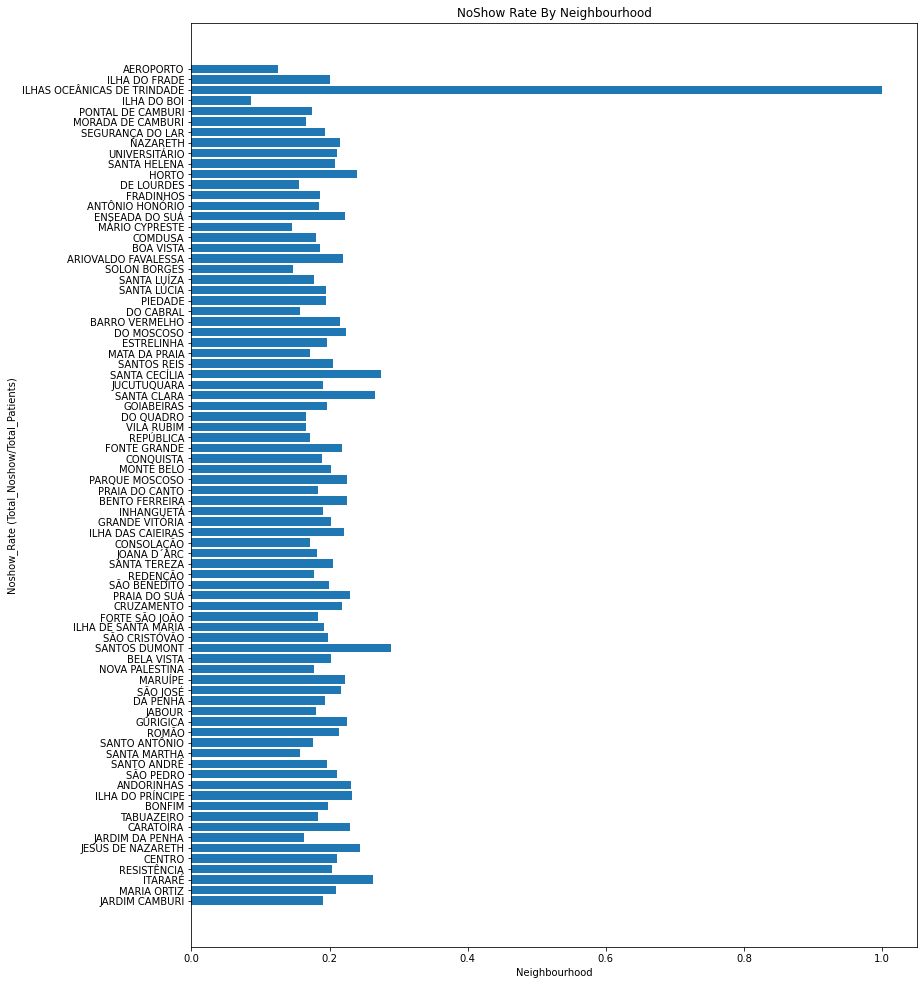

In [ ]:
fig, ax = plt.subplots()
ax.barh(df_no_show_Neigh["Neighbourhood"], df_no_show_Neigh["Noshow_Rate"])
#set the x-axis tick labels to the neighbourhood names
#x.set_xticklabels(df_no_show_Neigh["Neighbourhood"], rotation=90)
ax.set_title("NoShow Rate By Neighbourhood")
# Set the x-axis label
ax.set_xlabel("Neighbourhood")           
# Set the y-axis label
ax.set_ylabel("Noshow_Rate (Total_Noshow/Total_Patients)")
#plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = (13,17)

The location "Ilhas Oceanicas De Trindade" has the highest No_show rate among all locations.

### Q3: Whether appointments duration times matter 

In [ ]:
#calculate Duration dates mean, std
grouped = df.groupby('No_Show')['Duration_Time']

mean = grouped.apply(lambda x: np.mean(x))
std = grouped.apply(lambda x: np.std(x))

In [ ]:
mean, std

(No_Show
 0    8 days 07:02:52.927314
 1   15 days 08:16:32.405063
 Name: Duration_Time, dtype: timedelta64[ns],
 No_Show
 0   14 days 13:05:13.906822
 1   16 days 14:16:22.669428
 Name: Duration_Time, dtype: timedelta64[ns])

In [ ]:
# To convert "No-show mean, std" to "days"
mean_days = mean / np.timedelta64(1, 'D')

In [ ]:
mean_days

No_Show
0     8.293668
1    15.344820
Name: Duration_Time, dtype: float64

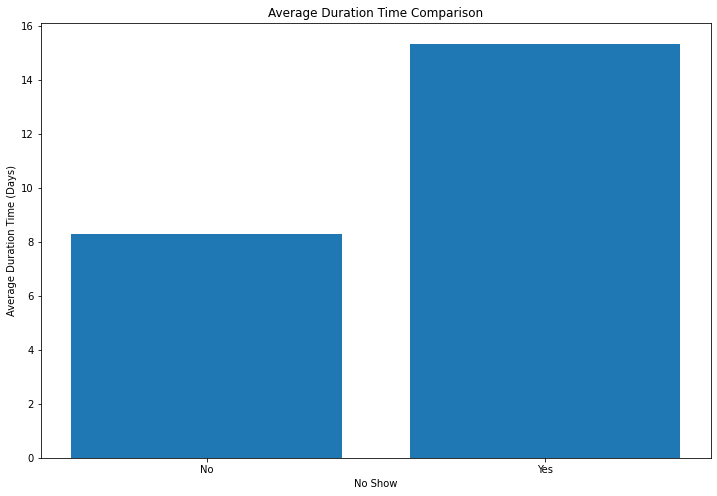

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
# plot relationship between No_Show and Duration_time
fig, ax = plt.subplots()

ax.bar([1, 2], [8.29, 15.34], tick_label=['No', 'Yes'])
ax.set_title('Average Duration Time Comparison')
ax.set_xlabel('No Show')
ax.set_ylabel('Average Duration Time (Days)');

The average duration days for "patients who made appointments, but no show" are nearly doubled, when compare to "patients who made appointments and show-up", which means, longer duration days will increase the likelihood for patients' "No-show" behaviors. 

### Q4: Whether Scholarships plays an important role affecting No-shows 

In [ ]:
noshow = df.No_Show == True

In [ ]:
showup = df.No_Show == False

In [ ]:
df.Scholarship[showup].mean()

0.09387847813742192

In [ ]:
df.Scholarship[noshow].mean()

0.11567465661190413

<Figure size 864x576 with 0 Axes>

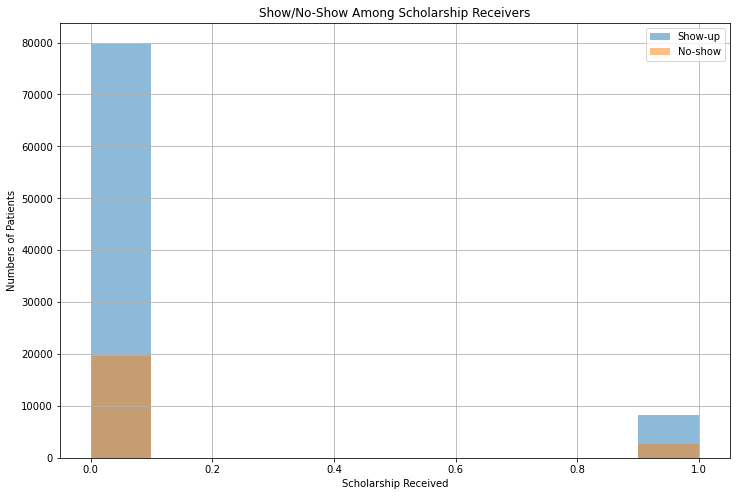

In [ ]:
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
df.Scholarship[showup].hist(alpha=0.5, label= 'Show-up')
df.Scholarship[noshow].hist(alpha=0.5, label= 'No-show')
ax.set_title('Show/No-Show Among Scholarship Receivers')
ax.set_xlabel('Scholarship Received')
ax.set_ylabel('Numbers of Patients');
plt.legend();

The average rate for patients who receive scholarship and showup is 9.39%. The averate rate for patients who receive scholarship but no-show is 11.57%, which is slightly higher than scholarship receivers who show up. It seems whether or not patients receive scholarships do not affect their show-up rate. 

### Q5: Whether Patients Received SMS Would have an effect on Appointment No-show Rate

In [ ]:
df.SMS_Received[showup].mean()

0.2914253265190233

In [ ]:
df.SMS_Received[noshow].mean()

0.4387736780680492

<Figure size 864x576 with 0 Axes>

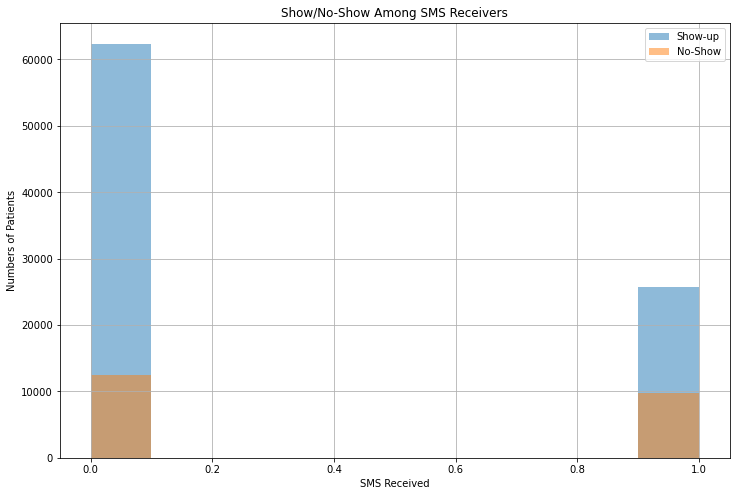

In [ ]:
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
df.SMS_Received[showup].hist(alpha=0.5, label= 'Show-up')
df.SMS_Received[noshow].hist(alpha=0.5, label= 'No-Show')
ax.set_title('Show/No-Show Among SMS Receivers')
ax.set_xlabel('SMS Received')
ax.set_ylabel('Numbers of Patients');
plt.legend();

The average show-up rate for SMS receivers are 29.14%. The average no-show rate for SMS receivers are 43.88%, which is a lot higher than people who receive SMS reminders and showup. SMS messagers do not affect people's show-up rate. 

<a id='conclusions'></a>
## Conclusions

### Q1: Whether certain patients have higher frequencies of No-shows than others 
1. Age doesn't really affect much of the results of show-up for their appointments or not. 

2. Patients who are under 18 have slightly higher of "No_show" frequency: 3.9% . Also, it seems SMS received or not doesn't affect the result of "show/no-show", but for this, we need to further analysis.

3. Whether or not they are in handcap doesn't play an important factor in their "no-show", no matter they are 18 or not.

### Q2: Whether certain locations have higher means of No-shows than others
The location "Ilhas Oceanicas De Trindade" has the highest No_show rate among all locations.

### Q3: Whether appointments duration times matter
The average duration days for "patients who made appointments, but no show" are nearly doubled, when compare to "patients who made appointments and show-up", which means, longer duration days will increase the likelihood for patients' "No-show" behaviors. 

### Q4: Whether Scholarships plays an important role affecting No-shows 
The average rate for patients who receive scholarship and showup is 9.39%. The averate rate for patients who receive scholarship but no-show is 11.57%, which is slightly higher than scholarship receivers who show up. It seems whether or not patients receive scholarships do not affect their show-up rate. 

### Q5: Whether Patients Received SMS Would have an effect on Appointment No-show Rate
The average show-up rate for SMS receivers are 29.14%. The average no-show rate for SMS receivers are 43.88%, which is a lot higher than people who receive SMS reminders and showup. SMS messages do not affect people's show-up rate.
Even though longer duration time will increase the likelyhood of patients no-show, but SMS messages are not effective in increasing the show-up rate. 
